## Transfer Learning Inception V3 using Keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import glob
import matplotlib.pyplot as plt
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:


from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3    #inceptionV3

from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
import os
a=['test/Decayed','test/Healthy','test/Infected','test/Other Leaves','train/Decayed','train/Healthy','train/Infected','train/Other Leaves','val/Decayed','val/Healthy','val/Infected','val/Other Leaves']
for FOLDER_PATH in a:
  ROOT_PATH = '/content/drive/MyDrive/Sweet Lime/Output'
  print(FOLDER_PATH,len(os.listdir(os.path.join(ROOT_PATH, FOLDER_PATH))))

test/Decayed 30
test/Healthy 30
test/Infected 30
test/Other Leaves 30
train/Decayed 210
train/Healthy 210
train/Infected 210
train/Other Leaves 210
val/Decayed 60
val/Healthy 60
val/Infected 60
val/Other Leaves 60


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Sweet Lime/Output/train'
valid_path = '/content/drive/MyDrive/Sweet Lime/Output/test'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Sweet Lime/Output/test*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
len(folders)

1

In [ ]:
prediction = Dense(4,name='output', activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
len(model.layers)



313

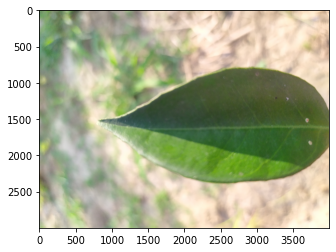

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
img1 = image.load_img('/content/drive/MyDrive/Sweet Lime/Output/train/Healthy/h2.jpg')
plt.imshow(img1);

#preprocess image
img1 = image.load_img('/content/drive/MyDrive/Sweet Lime/Output/train/Healthy/h2.jpg', target_size=(256, 256))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [ ]:
import tensorflow.nn.max_pool2d

ModuleNotFoundError: ignored

NameError: ignored

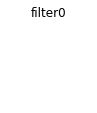

In [ ]:
import matplotlib.image as mpimg

fig=plt.figure(figsize=(14,7))
columns = 8
rows = 4
for i in range(columns*rows):
    #img = mpimg.imread()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter'+str(i))
    plt.imshow(max_pooling2d_1_features[0, :, :, i], cmap='viridis')
plt.show()

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Sweet Lime/Output/train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 840 images belonging to 4 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Sweet Lime/Output/test',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 120 images belonging to 4 classes.


In [ ]:
len(test_set)

8

In [ ]:
len(training_set)

53

In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
53/53 [==============================] - 518s 10s/step - loss: 2.9683 - accuracy: 0.7071 - val_loss: 0.7181 - val_accuracy: 0.8750
Epoch 2/20
53/53 [==============================] - 140s 3s/step - loss: 0.6722 - accuracy: 0.8976 - val_loss: 0.8333 - val_accuracy: 0.8583
Epoch 3/20
53/53 [==============================] - 138s 3s/step - loss: 0.4291 - accuracy: 0.9131 - val_loss: 1.7578 - val_accuracy: 0.8333
Epoch 4/20
53/53 [==============================] - 138s 3s/step - loss: 0.6595 - accuracy: 0.9095 - val_loss: 0.8474 - val_accuracy: 0.9250
Epoch 5/20
53/53 [==============================] - 139s 3s/step - loss: 0.3285 - accuracy: 0.9560 - val_loss: 0.6898 - val_accuracy: 0.9167
Epoch 6/20
53/53 [==============================] - 138s 3s/step - loss: 0.1192 - accuracy: 0.9786 - val_loss: 0.5994 - val_accuracy: 0.9250
Epoch 7/20
53/53 [==============================] - 138s 3s/step - loss: 0.3647 - accuracy: 0.9488 - val_loss: 0.6129 - val_accuracy: 0.8917
Epoch 8/20
5

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
valid_path

'/content/drive/MyDrive/Sweet Lime/Output/test'

In [ ]:
path = '/content/drive/MyDrive/Sweet Lime/Output/test/'

In [ ]:
test_data = []
ids = []
import os

for img in os.listdir(path):
  ids.append(img.split('.')[0])
  test_data.append(path+img)


In [ ]:
import pandas as pd
test_df = pd.DataFrame({'path':test_data})

In [ ]:
test_df.head()

,path
0,/content/drive/MyDrive/Sweet Lime/Output/test/...
1,/content/drive/MyDrive/Sweet Lime/Output/test/...
2,/content/drive/MyDrive/Sweet Lime/Output/test/...
3,/content/drive/MyDrive/Sweet Lime/Output/test/...


In [ ]:

y_pred = model.predict(test_set)


8/8 [==============================] - 18s 2s/step


In [ ]:
y_pred

array([[1.25798662e-20, 1.00000000e+00, 1.01034080e-31, 0.00000000e+00],
       [2.93277300e-19, 9.99999762e-01, 0.00000000e+00, 2.28119063e-07],
       [1.78406339e-34, 1.00000000e+00, 3.67744830e-38, 2.96914290e-35],
       [1.97172845e-20, 1.72482801e-16, 0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 1.27877852e-18, 4.23238009e-37, 5.04310727e-31],
       [1.31463732e-35, 1.00000000e+00, 5.91378466e-31, 0.00000000e+00],
       [5.12622080e-07, 1.04392013e-16, 9.99999523e-01, 3.43383513e-20],
       [1.00000000e+00, 2.97729197e-09, 2.54727647e-29, 5.81572927e-16],
       [1.00000000e+00, 1.28680239e-20, 3.53163612e-29, 8.24997279e-16],
       [7.14357943e-21, 3.30640097e-18, 8.06027830e-38, 1.00000000e+00],
       [1.40884754e-14, 1.63427665e-21, 0.00000000e+00, 1.00000000e+00],
       [1.48215849e-11, 3.52543881e-17, 1.00000000e+00, 2.57248419e-26],
       [6.33162621e-17, 3.87437532e-13, 1.00000000e+00, 2.01486119e-22],
       [1.00000000e+00, 0.00000000e+00, 0.00000000e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 1, 3, 0, 1, 2, 0, 0, 3, 3, 2, 2, 0, 1, 1, 0, 1, 2, 2, 3, 3,
       0, 2, 3, 3, 3, 1, 0, 1, 3, 0, 3, 1, 1, 1, 1, 3, 1, 2, 3, 1, 3, 2,
       0, 1, 0, 0, 2, 2, 1, 1, 0, 3, 1, 1, 0, 2, 3, 0, 1, 2, 2, 3, 0, 1,
       1, 2, 1, 2, 0, 0, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 2, 2, 1, 2, 1, 3,
       1, 2, 1, 0, 0, 1, 1, 3, 0, 3, 3, 3, 0, 2, 2, 3, 0, 2, 2, 2, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2])

In [ ]:
a=b=c=d=0
for i in y_pred:
  if i==0:
    a=a+1
  if i==1:
    b=b+1
  if i==2:
    c+=1
  if i==3:
    d+=1
print (a," ",b," ",c," ",d)

31   35   26   28


In [ ]:
len(y_pred)

120

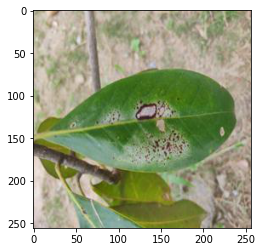

In [ ]:
# plt.imshow("/content/drive/MyDrive/Sweet Lime/Output/test/Healthy/h107.jpg")
# plt.show()
img = image.load_img('/content/drive/MyDrive/Sweet Lime/Output/test/Other Leaves/o153.jpg')
plt.imshow(img);
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5')

In [ ]:
import tensorflow

In [ ]:
img_data

array([[[[-0.9949558 , -0.99532485, -0.99661666],
         [-0.99498653, -0.9953556 , -0.9966474 ],
         [-0.99510956, -0.99538636, -0.9966474 ],
         ...,
         [-0.99504805, -0.995694  , -0.99584776],
         [-0.99510956, -0.99584776, -0.9959708 ],
         [-0.9952941 , -0.9960323 , -0.9961553 ]],

        [[-0.99483275, -0.9952018 , -0.9964321 ],
         [-0.99483275, -0.9952018 , -0.9964321 ],
         [-0.9949558 , -0.9952326 , -0.9964321 ],
         ...,
         [-0.99504805, -0.995694  , -0.99584776],
         [-0.9951403 , -0.9958785 , -0.99600154],
         [-0.99526334, -0.99600154, -0.99612457]],

        [[-0.9947405 , -0.9951403 , -0.99621683],
         [-0.9947405 , -0.99504805, -0.9961553 ],
         [-0.9947405 , -0.99504805, -0.99612457],
         ...,
         [-0.99510956, -0.9957555 , -0.9959093 ],
         [-0.9952941 , -0.99594   , -0.9960938 ],
         [-0.99532485, -0.9959708 , -0.99612457]],

        ...,

        [[-0.99387926, -0.9942484 , -0

In [ ]:
img=image.load_img('/content/drive/MyDrive/Sweet Lime/Output/test/Decayed/d129.jpg',target_size=(224,224))



In [ ]:
x=image.img_to_array(img)
x

array([[[109., 135., 100.],
        [100., 130.,  94.],
        [102., 132.,  96.],
        ...,
        [ 72.,  95.,  27.],
        [ 71.,  93.,  21.],
        [ 79., 100.,  25.]],

       [[103., 129.,  94.],
        [111., 138., 103.],
        [108., 135., 100.],
        ...,
        [ 70.,  93.,  23.],
        [ 77.,  99.,  27.],
        [ 78.,  99.,  24.]],

       [[ 94., 119.,  77.],
        [ 98., 125.,  84.],
        [108., 133.,  93.],
        ...,
        [ 78., 101.,  31.],
        [ 84., 105.,  36.],
        [ 79., 101.,  26.]],

       ...,

       [[ 38.,  45.,  55.],
        [ 36.,  40.,  49.],
        [ 29.,  36.,  42.],
        ...,
        [181., 197., 134.],
        [176., 195., 131.],
        [176., 194., 132.]],

       [[ 38.,  45.,  55.],
        [ 32.,  39.,  47.],
        [ 35.,  40.,  46.],
        ...,
        [185., 203., 145.],
        [182., 200., 140.],
        [188., 206., 146.]],

       [[ 33.,  40.,  50.],
        [ 30.,  37.,  45.],
        [ 29.,  

In [ ]:
imread()

OSError: ignored

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(x)

1/1 [==============================] - 0s 27ms/step


array([[9.7752213e-01, 2.4864047e-03, 1.9984538e-02, 6.9239486e-06]],
      dtype=float32)

In [ ]:
a=np.argmax(model.predict(x), axis=1)

1/1 [==============================] - 0s 25ms/step


In [ ]:
a==0

array([ True])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'

In [ ]:
!nvidia-smi

Fri Sep  9 18:53:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------